In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.float_format', '{:.4f}'.format)
%precision 4
plt.rcParams['figure.dpi'] = 150

In [3]:
import yfinance as yf
import requests_cache
session = requests_cache.CachedSession(expire_after='1D')

In [4]:
tickers_list = ['AAPL', 'ABBV', 'ABT', 'ACN', 'ADBE', 'AIG', 'AMD', 'AMGN', 'AMT', 'AMZN', 'AVGO', 'AXP', 'BA', 'BAC', 
                'BK', 'BKNG', 'BLK', 'BMY', 'BRK', 'C', 'CAT', 'CHTR', 'CL', 'CMCSA', 'COF', 'COP', 'COST', 'CRM', 
                'CSCO', 'CVS', 'CVX', 'DHR', 'DIS', 'DOW', 'DUK', 'EMR', 'EXC', 'F', 'FDX', 'GD', 'GE', 'GILD', 'GM', 
                'GOOG', 'GOOGL', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KHC', 'KO', 'LIN', 'LLY', 'LMT', 'LOW', 
                'MA', 'MCD', 'MDLZ', 'MDT', 'MET', 'META', 'MMM', 'META', 'MMM', 'MO', 'MRK', 'MS', 'MSFT', 'NEE', 
                'NFLX', 'NKE', 'NVDA', 'ORCL', 'PEP', 'PFE', 'PG', 'PM', 'PYPL', 'QCOM', 'RTX', 'SBUX', 'SCHW', 'SO', 
                'SPG', 'T', 'TGT', 'TMO', 'TMUS', 'TSLA', 'TXN', 'UNH', 'UNP', 'UPS', 'USB', 'V', 'VZ', 'WBA', 'WFC', 
                'WMT', 'XOM']

In [5]:
def download(**kwargs):
    # this function is wrapper around yf.download and add returns to it
    stocks = yf.download(**kwargs)
    returns = stocks['Adj Close'].pct_change()
    multi_index = pd.MultiIndex.from_product([['Returns'], stocks['Adj Close'].columns])
    stocks[multi_index] = returns
    stocks.columns.names = ['Variable', 'Ticker']
    return stocks

In [6]:
stocks = download(tickers = tickers_list, session=session)

[*********************100%***********************]  101 of 101 completed


/tmp/ipykernel_22945/511497442.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stocks[multi_index] = returns


# Calculate daily returns for the S&P 100 stocks.

In [7]:
returns = stocks['Adj Close'].pct_change() # daily returns

In [8]:
returns_2020 = returns['2019-08-01':'2020-08-01']
returns_2021 = returns['2020-08-01':'2021-08-01']

In [9]:
# Daily returns for 2020 fiscal year
returns_2020

Ticker,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,...,UNH,UNP,UPS,USB,V,VZ,WBA,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-01,-0.0216,-0.0123,-0.0117,0.0082,-0.0014,-0.0229,-0.0194,-0.0031,-0.0010,-0.0061,...,0.0010,-0.0275,-0.0208,-0.0255,0.0066,-0.0002,-0.0077,-0.0279,-0.0091,-0.0256
2019-08-02,-0.0212,-0.0068,-0.0030,-0.0059,-0.0158,-0.0069,-0.0141,0.0066,0.0192,-0.0173,...,0.0032,-0.0085,0.0019,-0.0047,-0.0098,0.0060,-0.0072,0.0081,0.0002,-0.0098
2019-08-05,-0.0523,-0.0018,-0.0310,-0.0387,-0.0455,-0.0280,-0.0493,-0.0306,-0.0073,-0.0319,...,-0.0200,-0.0385,-0.0201,-0.0429,-0.0482,-0.0067,-0.0337,-0.0274,-0.0327,-0.0205
2019-08-06,0.0189,-0.0071,0.0204,0.0176,0.0209,0.0297,0.0311,0.0163,0.0143,0.0129,...,0.0131,0.0089,0.0013,0.0096,0.0214,-0.0031,-0.0081,0.0171,0.0137,0.0097
2019-08-07,0.0104,-0.0048,-0.0031,0.0003,0.0098,0.0006,0.0114,-0.0050,0.0022,0.0031,...,-0.0074,-0.0084,0.0036,-0.0177,0.0165,0.0007,0.0200,-0.0239,0.0087,-0.0065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,0.0237,0.0005,0.0105,0.0085,0.0158,-0.0147,-0.0062,0.0229,0.0155,0.0154,...,-0.0073,0.0040,0.0225,-0.0206,0.0090,0.0004,-0.0165,-0.0293,-0.0002,0.0147
2020-07-28,-0.0164,-0.0046,-0.0013,-0.0051,-0.0111,0.0032,-0.0197,0.0064,0.0249,-0.0180,...,0.0045,-0.0136,-0.0115,0.0044,-0.0009,0.0107,0.0211,0.0016,0.0042,-0.0118
2020-07-29,0.0192,0.0031,0.0266,0.0099,0.0093,0.0556,0.1254,-0.0251,0.0168,0.0111,...,0.0225,0.0205,0.0339,0.0383,0.0094,-0.0005,0.0118,0.0098,-0.0081,0.0110


In [10]:
# Daily returns for 2021 fiscal year
returns_2021

Ticker,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,...,UNH,UNP,UPS,USB,V,VZ,WBA,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-03,0.0252,0.0109,0.0004,0.0107,0.0082,0.0000,0.0031,0.0110,-0.0184,-0.0167,...,0.0027,-0.0074,-0.0041,-0.0011,0.0015,-0.0042,0.0091,0.0012,-0.0008,0.0040
2020-08-04,0.0067,-0.0172,-0.0074,-0.0001,-0.0023,-0.0753,0.0949,-0.0152,0.0140,0.0087,...,0.0029,0.0094,0.0179,-0.0155,0.0084,0.0117,-0.0037,-0.0029,0.0181,0.0289
2020-08-05,0.0036,-0.0110,0.0221,0.0068,0.0058,0.0155,0.0032,-0.0087,-0.0188,0.0211,...,0.0262,0.0218,0.0025,0.0174,0.0198,-0.0064,-0.0029,0.0074,-0.0139,0.0087
2020-08-06,0.0349,-0.0073,-0.0038,0.0096,0.0325,-0.0285,0.0164,0.0003,0.0009,0.0062,...,0.0051,0.0121,0.0027,-0.0019,0.0136,0.0050,0.0020,-0.0025,-0.0035,-0.0048
2020-08-07,-0.0227,0.0038,-0.0051,0.0029,-0.0313,0.0457,-0.0215,-0.0036,0.0082,-0.0178,...,0.0095,0.0185,0.0786,0.0182,-0.0121,0.0121,0.0154,0.0342,0.0048,-0.0046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-26,0.0029,-0.0034,-0.0106,0.0010,-0.0081,0.0085,-0.0036,-0.0107,-0.0023,0.0118,...,-0.0100,0.0002,-0.0084,0.0083,0.0049,-0.0018,0.0155,0.0094,0.0014,0.0252
2021-07-27,-0.0149,0.0014,0.0024,0.0029,-0.0041,-0.0061,-0.0086,-0.0016,0.0080,-0.0198,...,0.0038,-0.0098,-0.0699,-0.0005,0.0027,0.0075,-0.0091,0.0029,0.0001,-0.0111
2021-07-28,-0.0122,0.0050,0.0059,-0.0112,0.0043,-0.0099,0.0758,-0.0018,-0.0066,0.0011,...,-0.0143,-0.0067,-0.0161,-0.0020,-0.0159,-0.0085,0.0062,0.0082,-0.0041,0.0067


# How well do annualized average returns in 2020 predict those in 2021?

In [11]:
# annualized average returns in 2020
returns_2020_annum = returns_2020.mean().mul(252)
# annualized average returns in 2021
returns_2021_annum = returns_2021.mean().mul(252)

In [12]:
# correlation between all stocks' 2020 and 2021 fiscal year returns
returns_2020_annum.corr(returns_2021_annum)

-0.0197

### Annualized average returns in 2020 are a poor predictor of annualized average returns in 2021. A correlation (also referred to as “r”) of -0.0197 was found. Under 0.25 is considered a weak relationship.

# How well do annualized standard deviations of returns in 2020 predict those in 2021?

In [13]:
stdev_2020 = returns_2020.std().mul(np.sqrt(252))
stdev_2021 = returns_2021.std().mul(np.sqrt(252))

In [14]:
# correlation between the standard deviations all stocks' 2020 and 2021 fiscal year returns 
stdev_2020.corr(stdev_2021)

0.8190

### Annualized standard deviations of returns in 2020 are a good predictor of those in 2021. They had a correlation of 0.8190. Over 0.75 is considered a strong relationship. Because 2020 returns don't predict 2021 returns well but 2020's standard deviations do, we can conclude we couldn't have predicted how these stocks' prices would move in 2021 based on 2020's prices, but we could know that regardless of how 2021 prices moved, they were going to have similar volatilities.

# What are the mean, median, minimum, and maximum pairwise correlations between two stocks?

In [15]:
returns_both_yrs = returns['2020-01-02':'2022-08-31':]

In [16]:
corr = returns_both_yrs.corr()

In [17]:
mean_corr = corr.mean().mean()
median_corr = corr.median().median()
min_corr = corr.min().min()
max_corrs = []
for c in corr.columns:
    corrs = corr[c]
    max_corrs.append(corrs[corrs < 1].max())
max_corr = max(max_corrs)

In [18]:
mean_corr

0.4775

In [19]:
median_corr

0.4798

In [20]:
min_corr

0.0601

In [21]:
max_corr

0.9937

### Mean Correlation: 0.4775
### Median Correlation: 0.4798
### Minimum Correlation: 0.0601
### Maximum Correlation for 2 different stocks: 0.99377

The smallest pairwise correlation between 2 stocks was between Verizon (VZ) and Tesla (TSLA), with a correlation of 0.0601. This is because these two companies are in industries that are viewed very differently by market participant, telecommunications and autonomous vehicle manufacturing, respectively. A telecomm firm like Verizon is a value stocks; it has existed for decades and has very slow growth rates, which means its stock has very low price and returns volatility relative to growth stocks like Tesla. Tesla's stock has much greater and more rapid price swings, which give it a high volatility and explain why its returns move nothing alike those of Verizon.
 
The closest correlation, 0.9937, is between the tickers GOOGL and GOOG, which makes sense as both these stocks are from the same parent company, Alphabet. GOOGL are Alpabet's Class A shares while GOOG are its Class C shares. Class A shares trade at a slight premium to Class C shares since they have voting rights while Class C shares don't. However, although their prices are usually different, the prices move almost identically, which explains a correlation of nearly 1.

# Plot annualized average returns versus annualized standard deviations of returns.

In [22]:
avg_returns = returns_both_yrs.mean().mul(252)
stdev_returns = returns_both_yrs.std().mul(np.sqrt(252))

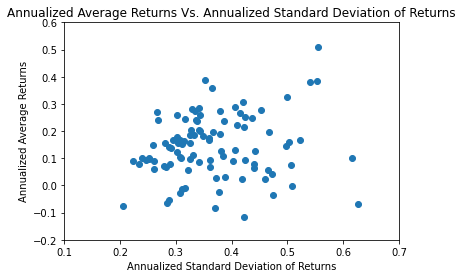

In [23]:
plt.scatter(stdev_returns, avg_returns)
plt.title('Annualized Average Returns Vs. Annualized Standard Deviation of Returns')
plt.xlabel('Annualized Standard Deviation of Returns')
plt.ylabel('Annualized Average Returns')
plt.xlim([0.1,0.7])
plt.ylim([-0.2,0.6])
plt.show()

There were two outliers on this graph, Berkshire Hathaway (BRK) and Tesla (TSLA). Both are not shown in order to give a closer up graph of the rest of the data points. Berkshire Hathaway had a return and standard deviation of 0 because data could not be pulled for it. The other outlier is Tesla, which had a return of 1.1249 over this period. Many factors are behind this growth. During the beginning of the COVID-19 pandemic in 2020, Tesla was one of just a few large cap public companies that was thriving because of fast growing sales, maintaining substantial liquidity, and finally turning profitable. While most stocks' prices crashed in 2020 and took around a year to return to pre-pandemic levels, Tesla's share price shot up a few hundred percent. It became one of the most popular stocks for retail investors to buy. Even more, due to Tesla’s commitment to sustainability initiatives, it gained a better ESG classification, which led to massive increases in the number of ETFs it was listed on, from 106 in July 2018 to 244 by December 2021.


# Repeat the exercise above (question 5) with 100 random portfolios of 2, 5, 10, and 25 stocks.

In [24]:
import random
from random import sample

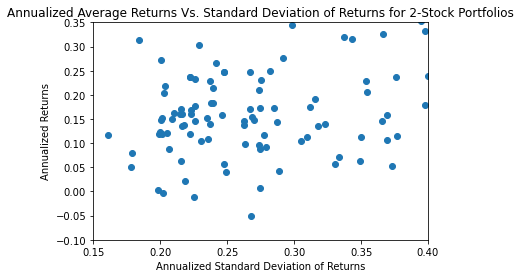

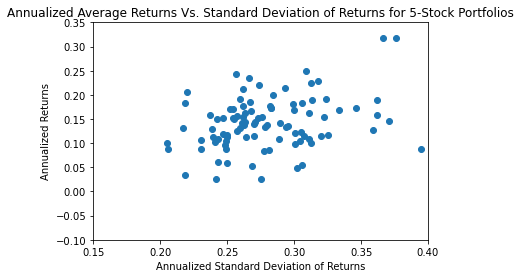

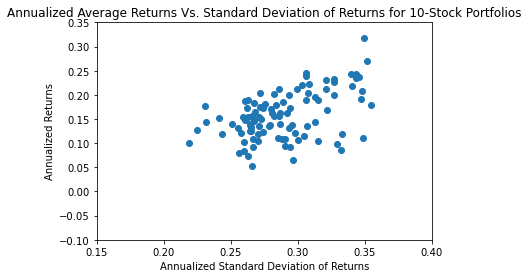

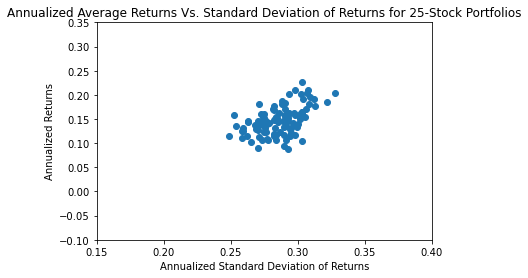

In [25]:
for n in [2, 5, 10, 25]:
    avg_returns = []
    stdev_returns = []
    for i in range(100):
        random_tickers = sample(list(tickers_list), n)
        avg_return = returns_both_yrs[random_tickers].mean(axis=1).mul(252).mean()
        stdev_return = returns_both_yrs[random_tickers].std(axis=1).mul(np.sqrt(252))
       
        avg_returns.append(avg_return)
        stdev_returns.append(stdev_return)
        std_array = np.array(pd.DataFrame(stdev_returns))
        average_std = []
        for r in std_array:
            sum_of_squares = 0
            for i in r:
                sum_of_squares += i**2
            divide = sum_of_squares/len(std_array[0])
            sqrt = np.sqrt(divide)
            average_std.append(sqrt)
        
    plt.scatter(average_std, avg_returns)
    plt.title(f'Annualized Average Returns Vs. Standard Deviation of Returns for {n}-Stock Portfolios')
    plt.xlabel('Annualized Standard Deviation of Returns')
    plt.ylabel('Annualized Returns')
    plt.xlim(.15,.4)
    plt.ylim(-.1,.35)
    plt.show()

In [34]:
returns['BRK'][returns['BRK']==0]

Date
1996-08-13   0.0000
1996-08-15   0.0000
1996-08-21   0.0000
1996-08-26   0.0000
1996-08-29   0.0000
              ...  
2022-10-06   0.0000
2022-10-07   0.0000
2022-10-10   0.0000
2022-10-11   0.0000
2022-10-12   0.0000
Name: BRK, Length: 2632, dtype: float64

Observing the graphs above, it's clear that portfolios holding more stocks from an index (in this case the S&P 100) have more predictable performances. The first graph, showing returns versus standard deviations for 100 random 2-stock portfolios, is very scattered. If we were to plot the data for a 101st portfolio on this graph, we wouldn't be able to estimate what it's annualized returns and standard deviations might be with a high degree of certainty. However, if we plotted a 101st 25-stock portfolio on the fourth graph, we could assume it's return would most likely be between 11% and 17%, and it would have a standard deviation of about 27% to 30%. We would be confident in our prediction because those are the ranges the vast majority of the 100 random portfolios on the graph are clustered in.

Furthermore, portfolios containing a larger number of stocks in an index will mimic that index's behavior more closely, so we can also conclude that the annualized returns and standard deviation of the S&P 100 over this time period will fall in the same ranges listed above. This also means that more diversified portfolios can attribute larger portions of their volatility to systematic (market) risk. Less diversified portfolios have more unsystematic risk. Therefore, more diversified portfolios are more predictable based on the market and are therefore less risky because they stabilize returns and mitigate the risks associated with individual stocks.
